# PROJECT:Baseball Case Study

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('baseball.csv')

In [3]:
#Lets check the shape of the data
df.shape


(30, 17)

In [4]:
#Lets see the first 5 rows of the data
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
# Lets check the datatypes
df.dtypes 


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

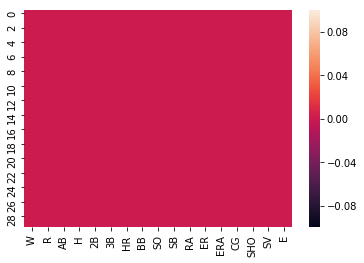

In [6]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# Great its showing no missing values

In [7]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
# Lets see the descriptive statistics
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can  see there is  positive correlation of win variable with few input features while negative correlation with few others

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


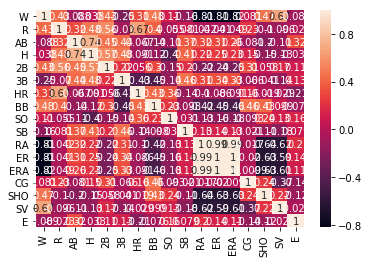

In [10]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A50D8AD2B0>,
      dtype=object)

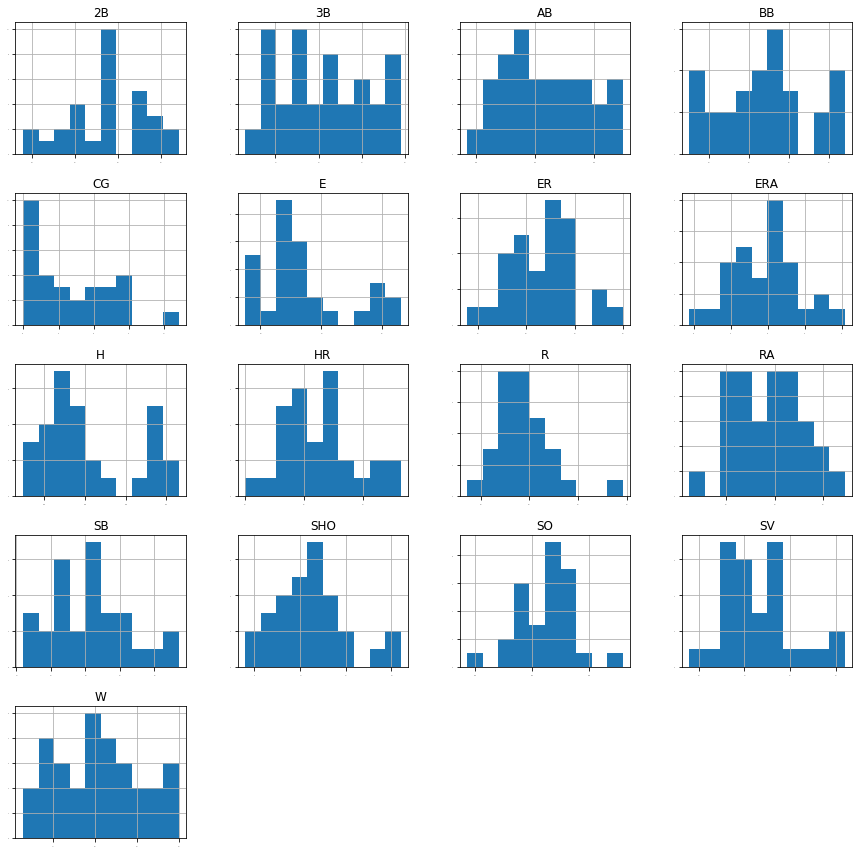

In [11]:
#Lets visualize distribution of numeric data
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(15,15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A50D8420B8>,
      dtype=object)

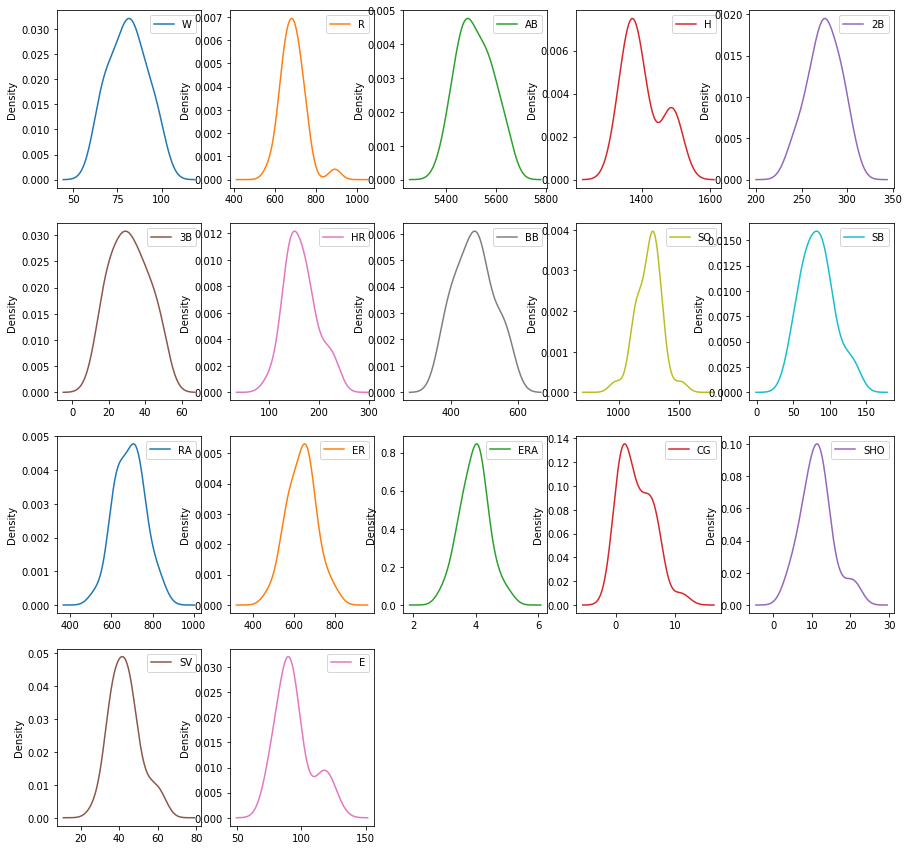

In [12]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(4,5), sharex=False, figsize=(15,15))

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

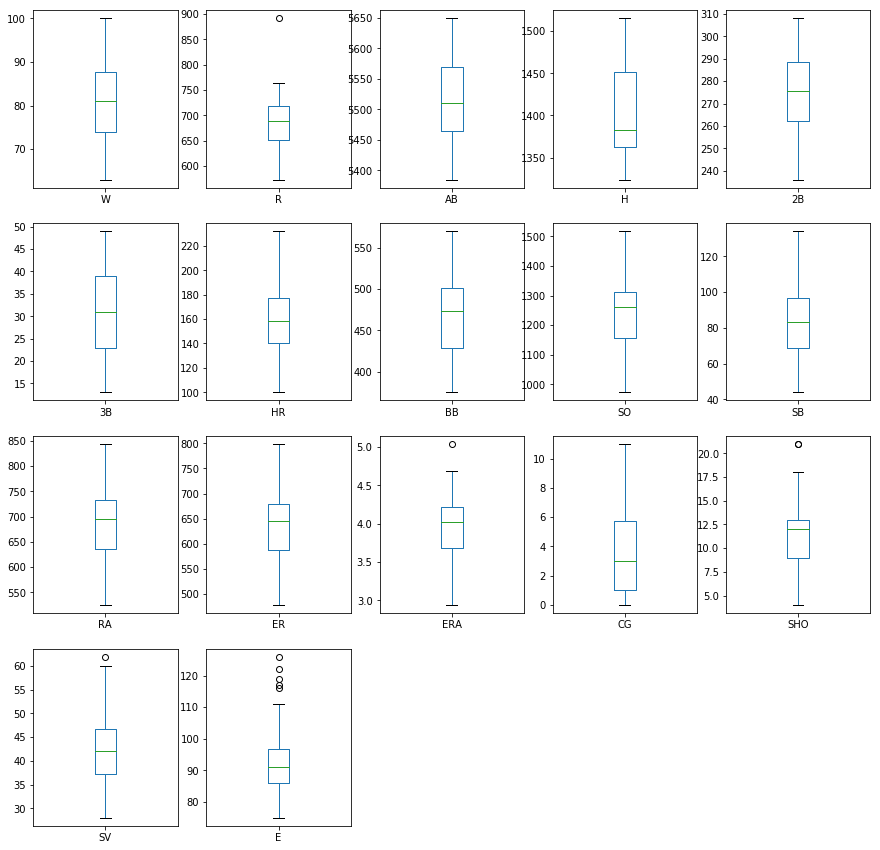

In [13]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(15,15))


In [14]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

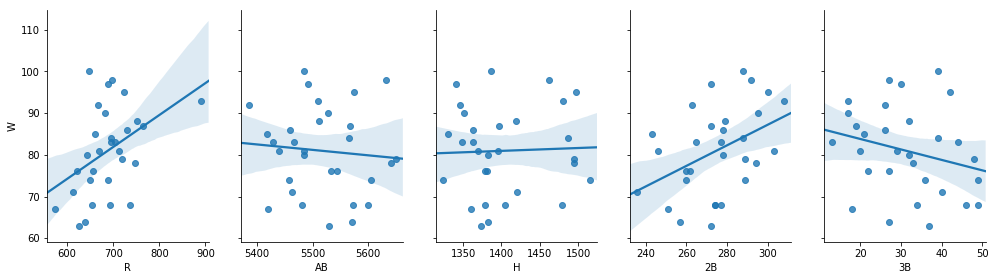

In [15]:
#Lets explore the relation of win variable with 5  features 'R', 'AB', 'H', '2B', '3B
sns.pairplot(df, x_vars=['R', 'AB', 'H', '2B', '3B'], size=4, aspect=0.7, y_vars='W',  kind='reg')


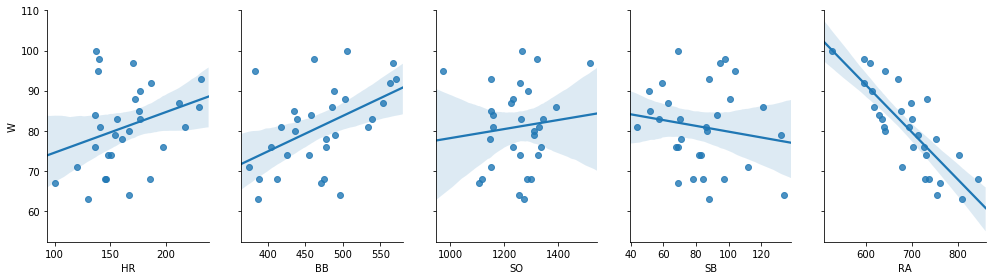

In [16]:
#Lets explore the relation of win variable with  next 5  features 'HR', 'BB', 'SO', 'SB', 'RA'
sns.pairplot(df, x_vars=['HR', 'BB', 'SO', 'SB', 'RA'], y_vars='W', size=4, aspect=0.7, kind='reg')


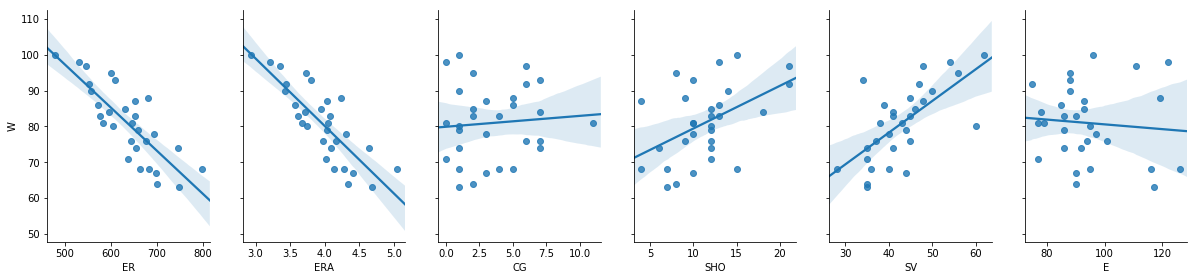

In [17]:
#Lets explore the relation of win variable with remaining 6  features 'ER','ERA', 'CG', 'SHO', 'SV', 'E'
sns.pairplot(df, x_vars=[ 'ER','ERA', 'CG', 'SHO', 'SV', 'E'], y_vars='W', size=4, aspect=0.7, kind='reg')


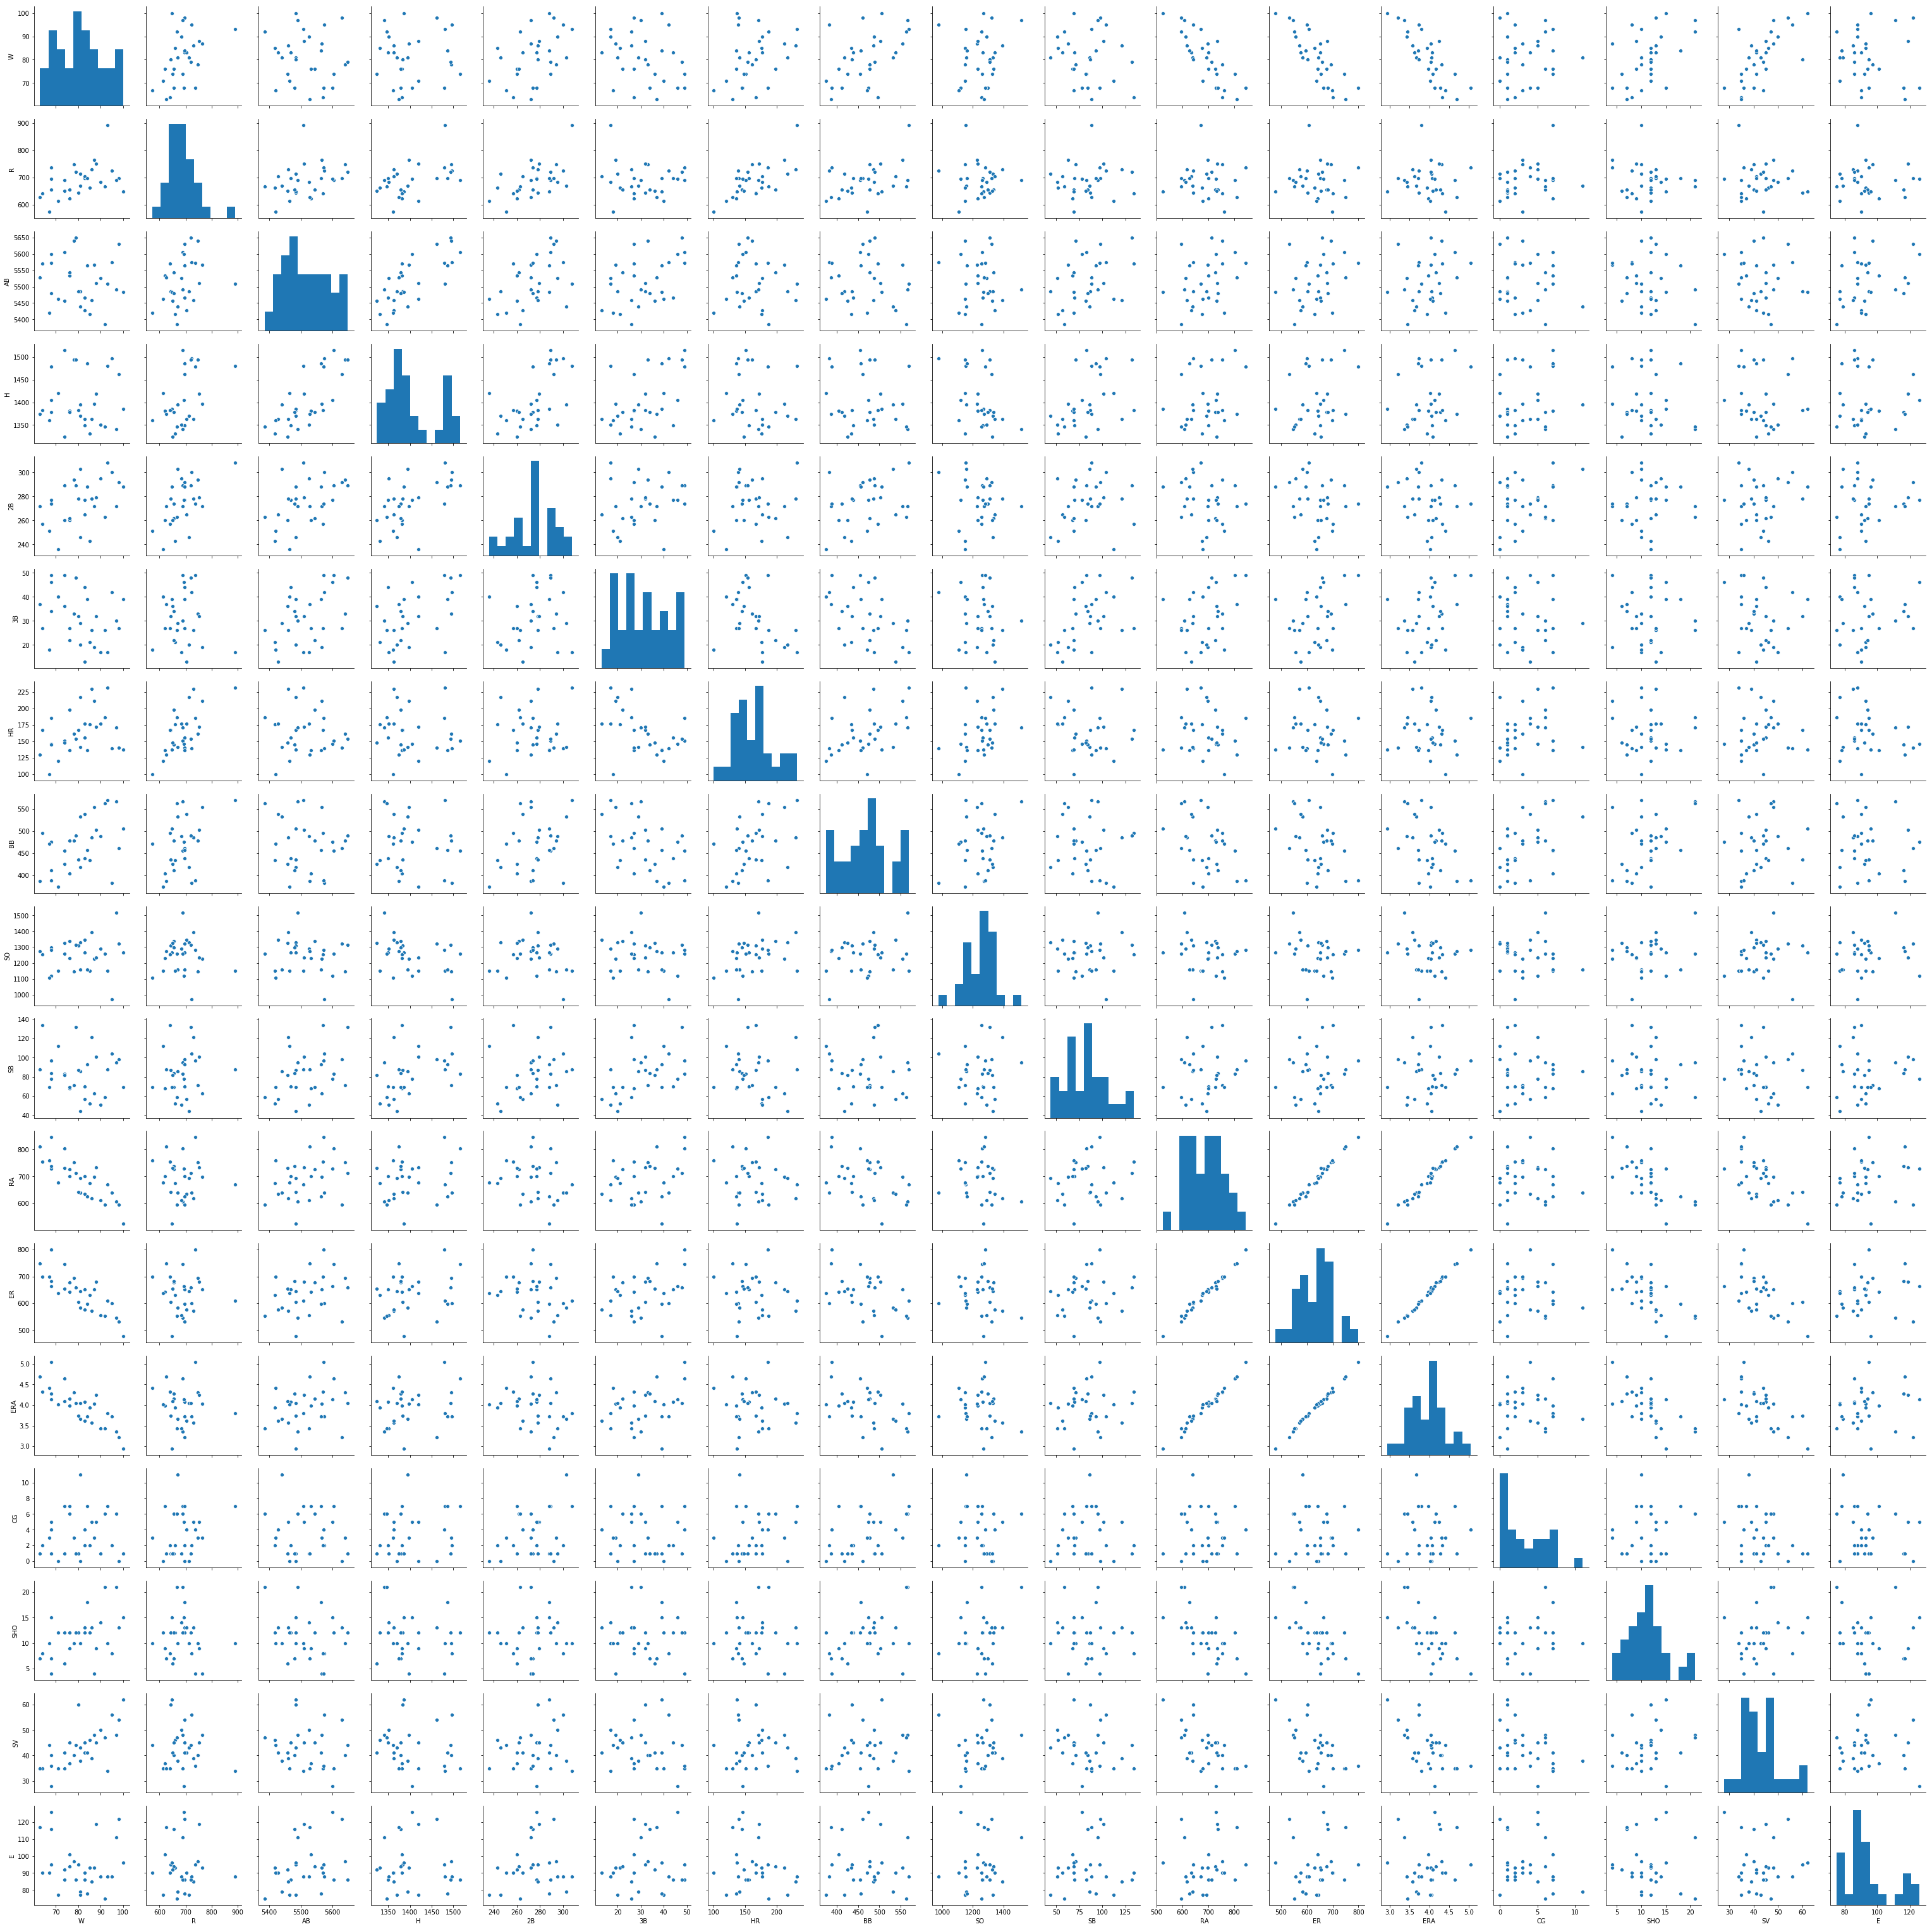

In [18]:
#Lets visualize the relation among all variables
sns.pairplot(df)

In [19]:
#Lets check the skewness of numeric data
df.skew()
#for variables R,H,CG,SHO,SV AND E have postive skewness beyond acceptable values

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [20]:
# Let us remove the Skewness with log as it is postively skewed
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [21]:
#Lets check skewness in data
df.skew()
# for several variables skewness has beeb brought in acceptable range, but in few varibales it cant come down due to nature of data
# so lets proceed

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [22]:
#Lets remove the negative skewness
for col in df.columns:                                      
    if df.skew().loc[col]<-0.55:
        df[col]=np.power(df[col],2)

In [23]:
#Lets check the skeness again
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.093545
SV     0.163057
E      0.632916
dtype: float64

In [24]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There was an outlier which has been removed

The shape of original dataframe was = (30, 17)
The shape of dataframe after removing outliers is = (29, 17)


In [25]:
# Let us seperate the features and Target
x=dfx.drop(['W'],axis=1)    
y=dfx[['W']]

In [26]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,4.827796,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,6.578965,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,5.749902,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,5.301898,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,6.578965,3.583519,4.465908


In [27]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,W
0,95
1,83
2,81
3,76
4,74


In [28]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [29]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [30]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -38.692162 (35.016402)
Lasso: -19.092555 (14.589008)
Ridge: -27.696354 (21.863104)
EN: -23.087591 (16.357367)
DT: -88.483333 (64.879395)
SVR: -94.906153 (68.294754)
KNN: -42.264000 (30.764047)


In [31]:
Comparison = pd.DataFrame({'ModelName':names1,'NMSE': results1})

In [32]:
Comparison.sort_values(by='NMSE', ascending=False)

,ModelName,NMSE
1,Lasso,-19.092555
3,EN,-23.087591
2,Ridge,-27.696354
0,LR,-38.692162
6,KNN,-42.264000
4,DT,-88.483333
5,SVR,-94.906153


In [33]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
ensemble = [('RF', RandomForestRegressor(random_state=5)),('ADR',AdaBoostRegressor(random_state=5)),('GBR',GradientBoostingRegressor(random_state=5))]
results2 = []
names2 = []
for name, model in ensemble: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -42.851167 (25.551738)
ADR: -35.736843 (25.110700)
GBR: -46.263625 (31.925859)


In [34]:
#Lets try to check if  cross val performance of Lasso can be improved  by changing parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1) 
sc = StandardScaler()
x1= sc.fit_transform(x)
alpha = [0.1, 0.2, 0.4, 0.5, 1, 5 ]
max_iter = [4,8,12,16,50,100,300,500,100]
selection= ['random','cyclic']     
normalize=[True,False]
precompute = [True,False]
positive=[True,False]
tol=[0.01,0.1,0.2,0.3,0.4]
warm_start=[True,False]
param_grid = dict(alpha=alpha,max_iter=max_iter,selection=selection,normalize=normalize, precompute=precompute,positive=positive, tol =tol,warm_start=warm_start)
mod = Lasso(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfoldx,n_jobs=-1)
grid_result = grid.fit(x1, y)

In [35]:
#Lets check if there is any improvement in neg mean square erroe
grid_result.best_score_
#Good to see that there is improvement in nmse i.e. error is reduced from -19.03 to 15.71

-15.711671246079156

In [36]:
#Lets check the best parameters
grid_result.best_params_

{'alpha': 0.1,
 'max_iter': 12,
 'normalize': True,
 'positive': False,
 'precompute': True,
 'selection': 'random',
 'tol': 0.01,
 'warm_start': True}

In [37]:
#Lets see the best estimator
grid_result.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=12, normalize=True,
   positive=False, precompute=True, random_state=5, selection='random',
   tol=0.01, warm_start=True)

In [38]:
# To confirm how good our model is lets check its  cross val r2 score
#Lets check its r2 score
ls = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=12, normalize=True,    positive=False, precompute=True, random_state=5, selection='random',
   tol=0.01, warm_start=True)
cross_val_score(ls,x1,y,cv=kfoldx,scoring="r2").mean()



-2.449467258301584

In [39]:
#lETS CHECK AT WHICH RANDOM STATE WE WILL GET MINIMUM MSE  
#Lets find out the best random state for selected Lasso in terms of minimum mse


min_mse=100
lsn= Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=12, normalize=True,positive=False, precompute=True, random_state=5, selection='random',
   tol=0.01, warm_start=True)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    # It is always better to scale the data after train test split to avoid leakge of information into test portion
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    lsn.fit(X_train,y_train)
    ypreds=lsn.predict(X_test)
    mse_c=mean_squared_error(y_test, ypreds)
    print('At random state ', i, 'the value of mse is ', mse_c)
    if mse_c<min_mse:
        min_mse=mse_c
        finalstate=i
print()
print()
print('minimum mse is', min_mse,'at random state' , finalstate)


At random state  1 the value of mse is  6.7513509436672985
At random state  2 the value of mse is  21.462138641548737
At random state  3 the value of mse is  25.28308246285856
At random state  4 the value of mse is  13.191842379065655
At random state  5 the value of mse is  7.894392537558012
At random state  6 the value of mse is  14.95102620459546
At random state  7 the value of mse is  16.76707525217392
At random state  8 the value of mse is  26.78774744164778
At random state  9 the value of mse is  31.801554699644765
At random state  10 the value of mse is  23.066058351069046
At random state  11 the value of mse is  14.040501389142397
At random state  12 the value of mse is  22.386589157379905
At random state  13 the value of mse is  9.926936177837954
At random state  14 the value of mse is  11.360636319186467
At random state  15 the value of mse is  16.337939380756673
At random state  16 the value of mse is  24.827888150992788
At random state  17 the value of mse is  16.97816707756

In [40]:
#Lets implement the model using best selected random state
lasso = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=12, normalize=True,positive=False, precompute=True, random_state=5, selection='random',
   tol=0.01, warm_start=True)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=68)
# It is always better to scale the data after train test split to avoid leakge of information into test portion
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
lasso.fit(X_train,y_train)
ypred=lasso.predict(X_test)
mse=mean_squared_error(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
rmse =np.sqrt(mse)
r2score= r2_score(y_test, ypred)
print('The value of mse is ', mse)
print('The value of mae is ', mae)
print('The value of rmse is ', rmse)
print('The value of r2score is ', r2score)

The value of mse is  3.9654310815603058
The value of mae is  1.5597999470031045
The value of rmse is  1.9913390172344603
The value of r2score is  0.952223721908912


In [41]:
# Lets save the predicted result to a csv file

dfx = pd.DataFrame(ypred,columns=['Predicted'])
dfx.to_csv('lasso_baseball_prediction.csv')

In [42]:
#Lets confirm the cross val nmse once more
kfoldt = KFold(n_splits=10, random_state=1) 
modelt = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=12, normalize=True,positive=False, precompute=True, random_state=5, selection='random',
   tol=0.01, warm_start=True)
cross_val_score(modelt,x1,y,cv =kfoldt,n_jobs=-1,scoring = 'neg_mean_squared_error').mean()

-15.213180782507587

In [43]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(lasso,'lasso_baseball.pkl')

['lasso_baseball.pkl']